In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
DDoS = pd.read_csv('/content/dataset_sdn.csv')
DDoS.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [6]:
DDoS.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [7]:
#Transformations of categorical features
DDoS['Protocol'] = DDoS['Protocol'].astype('category')
DDoS['src'] = DDoS['src'].astype('category')
DDoS['dst'] = DDoS['dst'].astype('category')

cat_columns = DDoS.select_dtypes(['category']).columns
DDoS[cat_columns] = DDoS[cat_columns].apply(lambda x: x.cat.codes)

In [8]:
DDoS["rx_kbps"] = DDoS["rx_kbps"].fillna(DDoS["rx_kbps"].mean())

In [9]:
DDoS["tot_kbps"] = DDoS["tot_kbps"].fillna(DDoS["tot_kbps"].mean())

In [10]:
from sklearn.model_selection import train_test_split
X = DDoS[['src','dst','dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow','Protocol' ,'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps']]
y = DDoS['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Feature scaling (or standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Input
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils

In [14]:

cnn = Sequential()
cnn.add(Convolution1D(22, 3,activation="relu",input_shape=(22, 1)))
cnn.add(MaxPooling1D(2,2))
cnn.add(Flatten())
cnn.add(Dense(64, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation="softmax"))

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 22)            88        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 22)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 220)               0         
                                                                 
 dense (Dense)               (None, 64)                14144     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                        

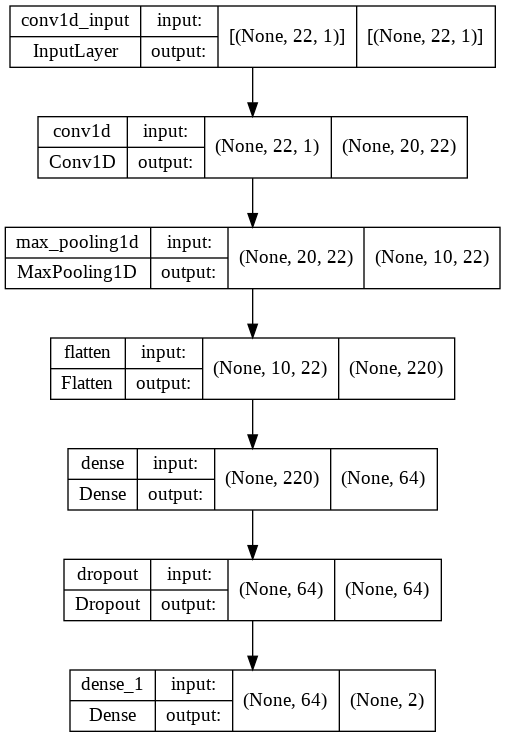

In [20]:

from tensorflow import keras
keras.utils.plot_model(cnn,show_shapes=True)

In [21]:
from keras.backend import sparse_categorical_crossentropy
cnn.compile(loss=sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [22]:
history = cnn.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
2609/2609 [==============================] - 8s 3ms/step - loss: 0.1643 - accuracy: 0.9314 - val_loss: 0.0820 - val_accuracy: 0.9663
Epoch 2/10
2609/2609 [==============================] - 8s 3ms/step - loss: 0.0867 - accuracy: 0.9655 - val_loss: 0.0599 - val_accuracy: 0.9763
Epoch 3/10
2609/2609 [==============================] - 7s 3ms/step - loss: 0.0669 - accuracy: 0.9734 - val_loss: 0.0493 - val_accuracy: 0.9809
Epoch 4/10
2609/2609 [==============================] - 11s 4ms/step - loss: 0.0541 - accuracy: 0.9785 - val_loss: 0.0386 - val_accuracy: 0.9845
Epoch 5/10
2609/2609 [==============================] - 9s 3ms/step - loss: 0.0473 - accuracy: 0.9820 - val_loss: 0.0312 - val_accuracy: 0.9872
Epoch 6/10
2609/2609 [==============================] - 7s 3ms/step - loss: 0.0439 - accuracy: 0.9834 - val_loss: 0.0297 - val_accuracy: 0.9893
Epoch 7/10
2609/2609 [==============================] - 9s 4ms/step - loss: 0.0390 - accuracy: 0.9845 - val_loss: 0.0273 - val_accuracy

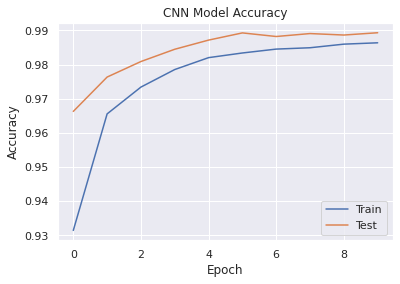

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('CNN Model Accuracy.png')
plt.show()

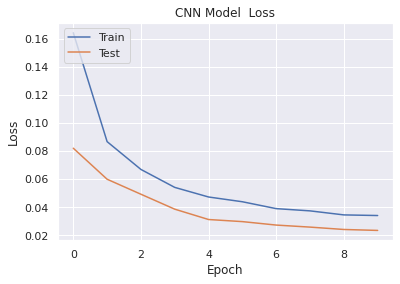

In [25]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('CNN Model Loss.png')
plt.show()

In [26]:
predict = cnn.predict(X_test, verbose=1)

653/653 [==============================] - 1s 1ms/step


In [27]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

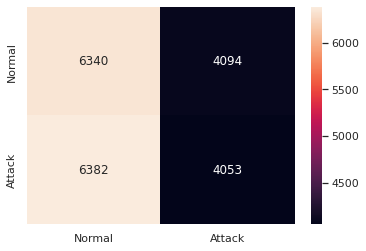

In [28]:
import seaborn as sns; sns.set()
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Normal","Attack"],columns = ["Normal","Attack"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [31]:
figure = ax.get_figure()    
figure.savefig('confusion_matrix_CNN.png', dpi=400)

In [30]:
scores = cnn.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))

accuracy: 98.93%
